In [1]:
import cvxpy as cp
import numpy as np
import osbdo as ob

In [2]:
import random, time

np.random.seed(1001)
random.seed(1001)

# Problem description
section 4.2 in https://web.stanford.edu/~boyd/papers/os_bundle_distr_opt.html 

# Create parameters

In [3]:
params, R = ob.ra_params(num_resources=50, num_agents=50, num_participants=500)

# Distributed solution

In [4]:
agents = ob.ra_agents(params=params)
g = ob.ra_coupling(agents, R)
prob = ob.Problem(agents = agents, g = g)

In [ ]:
ob.add_extra_methods_to_problem(prob)

In [5]:
max_iter = 50
start_time = time.time()
x_agent, x_global = prob.solve_var_metric(rel_gap=10**(-5), abs_gap=10**(-5), max_iter=max_iter,\
                                          memory=max_iter, poorman=True, print_freq=20)
print(f"elapsed time = {time.time() - start_time}")

/Users/parshakova.tanya/opt/anaconda3/envs/osbdo/lib/python3.9/site-packages/cvxpy/problems/problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


k=0, rel_gap=223.021469758155, L=-840063.2757961305, U=-3749.923061852199, L0=-840063.2757961305
   CS status='init', iters=1
k=20, rel_gap=0.039987269539586846, L=-4402.436447521255, U=-4233.163786197363, L0=-4402.436447521255
   CS status='null', iters=1
k=40, rel_gap=0.0364940627470094, L=-4393.865786638643, U=-4239.161558720005, L0=-4393.865786638643
   CS status='null', iters=1
elapsed time = 736.1044509410858


In [6]:
prob.lower_bnd[-1], prob.upper_bnd[-1]

(-4390.589821064684, -4240.31470890214)

# Centralized solution

In [7]:
h_cvx, x_cvx = ob.cvx_resource_allocation(params=params, R=R)

In [8]:
h_cvx, prob.upper_bnd[-1]

(-4278.68493859097, -4240.31470890214)

# Plot

i=32, omega_k=0.0376964292648516, omega_true=0.009635401054640393


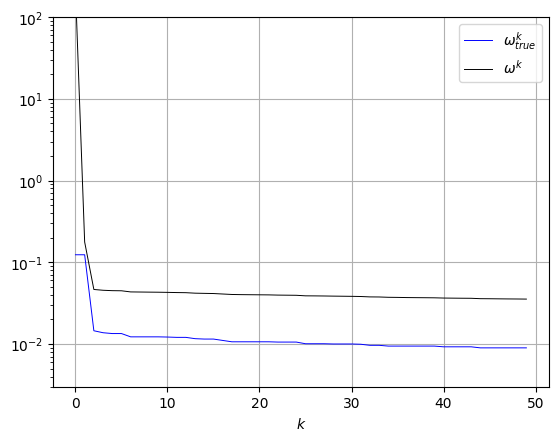

In [11]:
ob.plot_true_rel_gap_uk(y_min=3e-3, y_max=1e2, lk = prob.lower_bnd, uk = prob.upper_bnd, h_true = h_cvx, file_name='ra_var_metric_bounds.pdf')